## QTM 350: Data Science Computing

### Assignment 05 - Literate Programming with Quarto 

### Due Date: 11:59 PM on Wednesday, October 09, 2024

### Instructions

In this assignment, you will demonstrate your proficiency with Quarto by creating data science reports and presentations. You will analyse a sample of the [World Development Indicators dataset](https://databank.worldbank.org/source/world-development-indicators), focusing on one year (2022) and 14 variables. Your task involves performing data analysis, generating visualisations, and producing reproducible documents in multiple formats.

Please write a `README.md` file that includes the URL of the repository you create, along with the URLs of the HTML report and slides published on GitHub Pages or GitHack (not the raw files in your repository). The resulting PDF should be stored in the repository, as should all the `.qmd` files.

### Data

The sample dataset is provided in the file `wdi.csv`. The dataset is available in [our GitHub repository](https://github.com/danilofreire/qtm350/tree/main/assignments/wdi.csv). You can also create the dataset by running the Python code below.

In [2]:
# Install the necessary libraries
# pip install pandas
# pip install wbgapi

# Import the libraries
import pandas as pd
import wbgapi as wb

In [3]:
# Define the indicators to download
indicators = {
    'gdp_per_capita': 'NY.GDP.PCAP.CD',
    'gdp_growth_rate': 'NY.GDP.MKTP.KD.ZG',
    'inflation_rate': 'FP.CPI.TOTL.ZG',
    'unemployment_rate': 'SL.UEM.TOTL.ZS',
    'total_population': 'SP.POP.TOTL',
    'life_expectancy': 'SP.DYN.LE00.IN',
    'adult_literacy_rate': 'SE.ADT.LITR.ZS',
    'income_inequality': 'SI.POV.GINI',
    'health_expenditure_gdp_share': 'SH.XPD.CHEX.GD.ZS',
    'measles_immunisation_rate': 'SH.IMM.MEAS',
    'education_expenditure_gdp_share': 'SE.XPD.TOTL.GD.ZS',
    'primary_school_enrolment_rate': 'SE.PRM.ENRR',
    'exports_gdp_share': 'NE.EXP.GNFS.ZS'
}

# Get the list of country codes for the "World" region
country_codes = wb.region.members('WLD')

# Download data for countries only in 2022
df = wb.data.DataFrame(indicators.values(), economy=country_codes, time=2022, skipBlanks=True, labels=True).reset_index()

# Delete the 'economy' column
df = df.drop(columns=['economy'], errors='ignore')

# Create a reversed dictionary mapping indicator codes to names
# Rename the columns and convert all names to lowercase
df.rename(columns=lambda x: {v: k for k, v in indicators.items()}.get(x, x).lower(), inplace=True)

# Sort 'country' in ascending order
df = df.sort_values('country', ascending=True)

# Reset the index after sorting
df = df.reset_index(drop=True)

# Display the number of rows and columns
print(df.shape)

# Display the first few rows of the data
print(df.head(3))

# Save the data to a CSV file
df.to_csv('wdi.csv', index=False)


(217, 14)
       country  inflation_rate  exports_gdp_share  gdp_growth_rate  \
0  Afghanistan             NaN          18.380042        -6.240172   
1      Albania        6.725203          37.395422         4.856402   
2      Algeria        9.265516          31.446856         3.600000   

   gdp_per_capita  adult_literacy_rate  primary_school_enrolment_rate  \
0      352.603733                  NaN                            NaN   
1     6810.114041                 98.5                      95.606712   
2     5023.252932                  NaN                     108.343933   

   education_expenditure_gdp_share  measles_immunisation_rate  \
0                              NaN                       68.0   
1                          2.74931                       86.0   
2                              NaN                       79.0   

   health_expenditure_gdp_share  income_inequality  unemployment_rate  \
0                           NaN                NaN             14.100   
1        

In [10]:
summary_stats = df[['gdp_per_capita', 'life_expectancy', 'unemployment_rate']].describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
gdp_per_capita,203.0,20345.707649,31308.942225,259.025031,2570.563284,7587.588173,25982.63005,240862.182448
life_expectancy,209.0,72.416519,7.713322,52.997000,66.782000,73.514634,78.47500,85.377000
unemployment_rate,186.0,7.268661,5.827726,0.130000,3.500750,5.537500,9.45525,37.852000


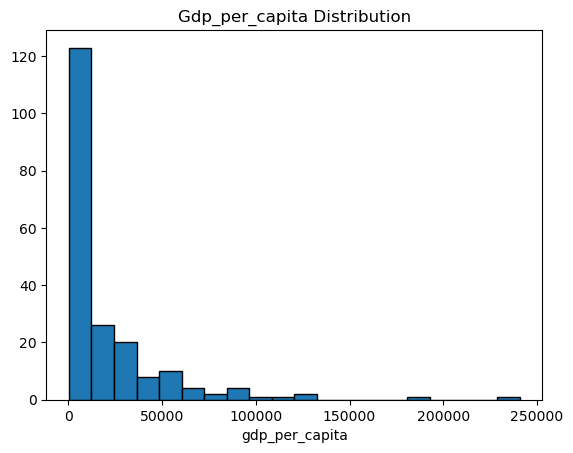

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['gdp_per_capita'], bins=20, edgecolor='black')
plt.title('Gdp_per_capita Distribution')
plt.xlabel('gdp_per_capita')
plt.show()


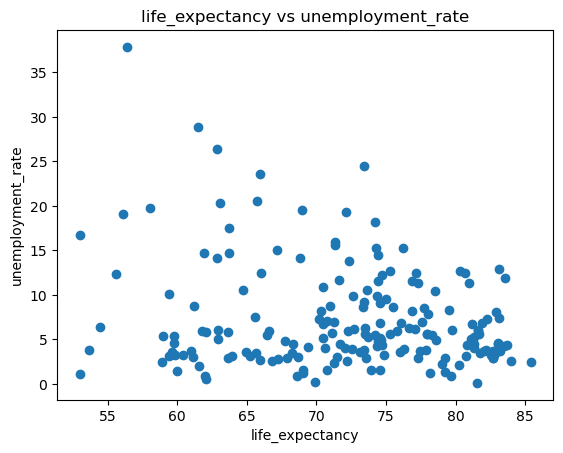

In [6]:
plt.scatter(df['life_expectancy'], df['unemployment_rate'])
plt.title('life_expectancy vs unemployment_rate')
plt.xlabel('life_expectancy')
plt.ylabel('unemployment_rate')
plt.show()

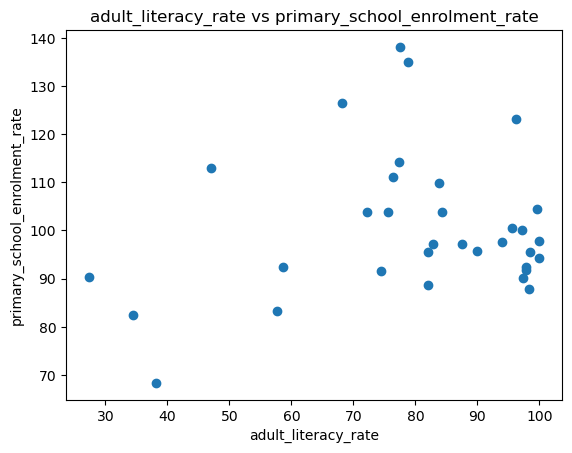

In [7]:
plt.scatter(df['adult_literacy_rate'], df['primary_school_enrolment_rate'])
plt.title('adult_literacy_rate vs primary_school_enrolment_rate')
plt.xlabel('adult_literacy_rate')
plt.ylabel('primary_school_enrolment_rate')
plt.show()

### Tasks

1. Please initialise a new `.qmd` file with an appropriate `YAML` header. Include metadata such as `title`, `author`, `date`, and specify the output format as `HTML` and `PDF`.
   
2. Load the dataset using your preferred programming language (R or Python). 
   
3. Conduct exploratory data analysis on at least three indicators of your choice. Summarise your findings in markdown sections. Show your code and results.
   
4. Create at least two different types of plots (e.g., bar chart, scatter plot) to represent your analysis. Use Quarto code chunks to embed these visualisations. Add a title and axis labels to each plot. Use Quarto to include a caption and a reference to the source of the data. Hide your code in the final document.
   
5. Construct a table that highlights some key statistics from your analysis. Ensure the table is well-formatted and included in the report.
   
6. Include cross-references to your figures and tables within the text. Demonstrate proper labeling and referencing techniques.
   
7. Add a bibliography using BibTeX (`.bib`). Cite at least two sources related to your analysis.
   
8.  Create a new `.qmd` file configured for `revealjs` output. Include a title slide, a few content slides, and a concluding slide. 
   
9.  Incorporate your analysis and visualisations from the report into the presentation.
    
10. Customise the presentation theme and incorporate at least one transition effect between slides.
    
11. Render your report and presentation to HTML, PDF, and Revealjs (HTML) formats. 
    
12. Use Git to manage your project and create a repository on GitHub. Submit the link to your repository on Canvas.
    
13. Set up GitHub Pages (preferably) or use GitHack to host your HTML report and presentation. Add the links of the published pages to your `README.md` file. Do not forget to include the PDF report and the `.qmd` files in your repository.

### Bonus Questions

14. Develop an interactive dashboard within your report using Quarto's dashboard features. Incorporate dynamic filters or widgets.
    
15. Configure automated rendering of your report using Quarto's command-line interface, possibly integrating with GitHub Actions for continuous integration.